#### packages

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt
import forestplot as fp

In [22]:
pd.options.display.float_format = '{:.5f}'.format

In [23]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [24]:
df = pd.read_csv('re_0820.csv', encoding='cp949')
df.isnull().sum()

pid            0
majorcat       0
province       0
area           0
sex            0
            ... 
교통수단        4526
출퇴근시간       4525
사업체지역        100
산업체           65
산업체분류         65
Length: 131, dtype: int64

In [25]:
df_copy = df.copy()

##### 수도권에 취업한 사람 중 비수도권 대학은 없음

In [26]:
비수도권 = df_copy[(df_copy['사업체지역']!='서울')&(df_copy['사업체지역']!='경기')].copy()

model = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태) + C(결혼상태)''', 비수도권).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.350217
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2678
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Aug 2023   Pseudo R-squ.:                  0.1355
Time:                        17:18:22   Log-Likelihood:                -939.98
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 1.346e-61
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -10.1102      0.876    -11.535      0.000     -11.828      -8.392
C(성별, Treatment("여자"))[T.남자]    -0.1238      0.139     -0.891      0.373      -0.396       0.148
C(건강상태)[T.건강하지않다]               -0.0622      0.192     -0.324      0.746      -0.438       0.314
C(건강상태)[T.보통이다]                 -0.1680      0.146     -1.153      0.249      -0.454       0.118
C(결혼상태)[T.미혼]                   -1.4635      0.265     -5.515      0.000      -1.984      -0.943
age                              0.3699      0.031     12.115      0.000       0.310       0.430
================================================================================================
"""

In [41]:
비수도권.shape

(2684, 131)

In [27]:
print(f'모델 AIC:{model.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1891.9636923303528




,OR,Lower CI,Upper CI
Intercept,0.00004,0.00001,0.00023
"C(성별, Treatment(""여자""))[T.남자]",0.88357,0.67303,1.15998
C(건강상태)[T.건강하지않다],0.93969,0.64503,1.36894
C(건강상태)[T.보통이다],0.84537,0.63531,1.12489
C(결혼상태)[T.미혼],0.23143,0.13757,0.38931
age,1.44761,1.36352,1.53689


In [28]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment("여자")) + C(건강상태,Treatment("건강하지않다")) 
    + C(결혼상태, Treatment("미혼"))+ C(대학지역,Treatment('비수도권'))+ C(전공일치,Treatment("맞지않다")) 
    + 학점 + C(재학중일자리경험,Treatment('없다'))''', 비수도권).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.333380
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2559
Method:                           MLE   Df Model:                           10
Date:                Mon, 21 Aug 2023   Pseudo R-squ.:                  0.1771
Time:                        17:18:23   Log-Likelihood:                -856.79
converged:                       True   LL-Null:                       -1041.1
Covariance Type:            nonrobust   LLR p-value:                 4.336e-73
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -10.5997      0.898    -11.799      0.000     -12.360      -8.839
C(성별, Treatment("여자"))[T.남자]            -0.1805      0.147     -1.225      0.221      -0.469       0.108
C(건강상태, Treatment("건강하지않다"))[T.건강하다]    -0.0712      0.200     -0.356      0.722      -0.463       0.321
C(건강상태, Treatment("건강하지않다"))[T.보통이다]    -0.1841      0.224     -0.820      0.412      -0.624       0.256
C(결혼상태, Treatment("미혼"))[T.기혼]           1.4046      0.276      5.096      0.000       0.864       1.945
C(대학지역, Treatment('비수도권'))[T.수도권]       -0.0638      0.174     -0.366      0.715      -0.406       0.278
C(전공일치, Treatment("맞지않다"))[T.보통이다]       0.0029      0.166      0.018      0.986      -0.322       0.327
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        0.5416      0.145      3.738      0.000       0.258       0.826
C(재학중일자리경험, Treatment('없다'))[T.있다]      -0.9722      0.130     -7.502      0.000      -1.226      -0.718
나이                                       0.3816      0.032     11.793      0.000       0.318       0.445
학점                                      -0.3269      0.123     -2.655      0.008      -0.568      -0.086
========================================================================================================
"""

In [29]:
print(f'모델 AIC:{model_2.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1735.5733701580805




,OR,Lower CI,Upper CI
Intercept,0.00002,0.00000,0.00014
"C(성별, Treatment(""여자""))[T.남자]",0.83483,0.62536,1.11445
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",0.93123,0.62921,1.37821
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",0.83184,0.53574,1.29158
"C(결혼상태, Treatment(""미혼""))[T.기혼]",4.07378,2.37347,6.99217
"C(대학지역, Treatment('비수도권'))[T.수도권]",0.93819,0.66647,1.32069
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",1.00293,0.72503,1.38735
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",1.71880,1.29382,2.28336
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.37825,0.29340,0.48763
나이,1.46457,1.37458,1.56045


In [30]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(결혼상태, Treatment('미혼')) + C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment('맞지않다')) 
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', 비수도권).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.323231
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2551
Method:                           MLE   Df Model:                           18
Date:                Mon, 21 Aug 2023   Pseudo R-squ.:                  0.2021
Time:                        17:18:24   Log-Likelihood:                -830.70
converged:                       True   LL-Null:                       -1041.1
Covariance Type:            nonrobust   LLR p-value:                 4.104e-78
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -9.8511      0.925    -10.652      0.000     -11.664      -8.039
C(성별, Treatment('여자'))[T.남자]                 -0.1355      0.150     -0.901      0.367      -0.430       0.159
C(건강상태, Treatment('건강하지않다'))[T.건강하다]         -0.3118      0.218     -1.431      0.152      -0.739       0.115
C(건강상태, Treatment('건강하지않다'))[T.보통이다]         -0.2872      0.231     -1.241      0.215      -0.741       0.166
C(결혼상태, Treatment('미혼'))[T.기혼]                1.3913      0.282      4.935      0.000       0.839       1.944
C(대학지역, Treatment('비수도권'))[T.수도권]            -0.1098      0.178     -0.617      0.537      -0.459       0.239
C(전공일치, Treatment('맞지않다'))[T.보통이다]           -0.0374      0.169     -0.221      0.825      -0.369       0.294
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.2886      0.151      1.916      0.055      -0.007       0.584
C(재학중일자리경험, Treatment('없다'))[T.있다]           -1.0039      0.132     -7.605      0.000      -1.263      -0.745
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]        0.0202      0.280      0.072      0.942      -0.528       0.569
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]       0.1021      0.223      0.457      0.648      -0.336       0.540
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]       -0.3561      0.363     -0.981      0.327      -1.068       0.355
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]      -0.1025      0.245     -0.418      0.676      -0.583       0.378
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]     -0.0916      0.318     -0.288      0.773      -0.715       0.532
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]    -0.2119      0.221     -0.957      0.339      -0.646       0.222
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -1.2706      0.245     -5.196      0.000      -1.750      -0.791
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.7059      0.146     -4.826      0.000      -0.993      -0.419
나이                                            0.3797      0.033     11.463      0.000       0.315       0.445
학점                                           -0.3127      0.125     -2.492      0.013      -0.559      -0.067
=============================================================================================================
"""

In [31]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

모델 AIC:1699.4056990099975




,OR,Lower CI,Upper CI
Intercept,0.00005,0.00001,0.00032
"C(성별, Treatment('여자'))[T.남자]",0.87326,0.65033,1.17260
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",0.73216,0.47768,1.12222
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",0.75039,0.47673,1.18112
"C(결혼상태, Treatment('미혼'))[T.기혼]",4.02020,2.31347,6.98607
"C(대학지역, Treatment('비수도권'))[T.수도권]",0.89599,0.63202,1.27020
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",0.96325,0.69160,1.34160
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.33455,0.99335,1.79295
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.36645,0.28291,0.47466
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",1.02044,0.58951,1.76640


In [35]:
odds_ratios_3.index = ['절편', '성별 Ref:여자|남자',
       '건강상태 Ref:건강하지않다|건강하다',
       '건강상태 Ref:건강하지않다|보통이다',
       '결혼상태 Ref:미혼|기혼', '대학지역,Ref:비수도권|수도권',
       '전공일치 Ref:맞지않다|보통이다',
       '전공일치 Ref:맞지않다|잘맞다',
       '재학중일자리경험 Ref:없다|있다',
       '삶의만족도_개인 REF:그렇지않다|그렇다',
       '삶의만족도_개인 REF:그렇지않다|보통이다',
       '삶의만족도_관계 REF:그렇지않다|그렇다',
       '삶의만족도_관계 REF:그렇지않다|보통이다',
       '삶의만족도_소속집단 REF:그렇지않다|그렇다',
       '삶의만족도_소속집단 REF:그렇지않다|보통이다',
       '업무만족도 REF:그렇지않다|그렇다',
       '업무만족도 REF:그렇지않다|보통이다', '나이', '학점']

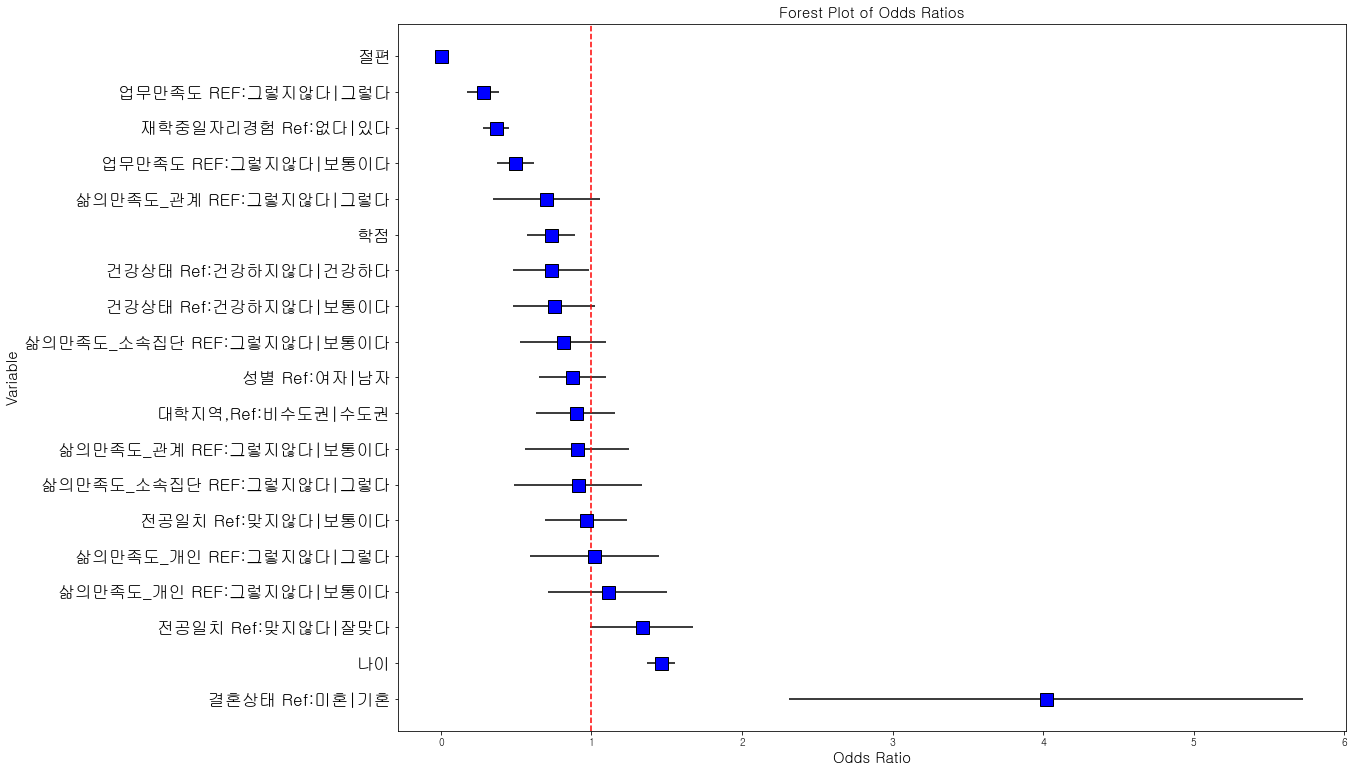

In [36]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios', fontsize=15)

# Show the plot
plt.show()

In [37]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment('맞지않다')) 
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', 비수도권).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.327858
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2552
Method:                           MLE   Df Model:                           17
Date:                Mon, 21 Aug 2023   Pseudo R-squ.:                  0.1907
Time:                        17:20:43   Log-Likelihood:                -842.60
converged:                       True   LL-Null:                       -1041.1
Covariance Type:            nonrobust   LLR p-value:                 7.678e-74
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   -10.9516      0.898    -12.189      0.000     -12.713      -9.191
C(성별, Treatment('여자'))[T.남자]                 -0.2647      0.147     -1.797      0.072      -0.553       0.024
C(건강상태, Treatment('건강하지않다'))[T.건강하다]         -0.2628      0.217     -1.211      0.226      -0.688       0.163
C(건강상태, Treatment('건강하지않다'))[T.보통이다]         -0.2249      0.230     -0.978      0.328      -0.676       0.226
C(대학지역, Treatment('비수도권'))[T.수도권]            -0.1631      0.178     -0.916      0.360      -0.512       0.186
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.0031      0.166      0.019      0.985      -0.323       0.329
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.3107      0.150      2.076      0.038       0.017       0.604
C(재학중일자리경험, Treatment('없다'))[T.있다]           -1.0025      0.131     -7.680      0.000      -1.258      -0.747
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -0.0616      0.279     -0.221      0.825      -0.607       0.484
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]       0.0600      0.224      0.268      0.788      -0.378       0.498
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]       -0.3729      0.361     -1.033      0.301      -1.080       0.334
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]      -0.0955      0.246     -0.388      0.698      -0.577       0.386
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]     -0.0100      0.314     -0.032      0.975      -0.626       0.606
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]    -0.2153      0.220     -0.980      0.327      -0.646       0.215
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -1.2764      0.243     -5.244      0.000      -1.754      -0.799
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.7050      0.144     -4.881      0.000      -0.988      -0.422
나이                                            0.4245      0.032     13.337      0.000       0.362       0.487
학점                                           -0.3102      0.126     -2.469      0.014      -0.556      -0.064
=============================================================================================================
"""

In [38]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

모델 AIC:1721.1906150807831




,OR,Lower CI,Upper CI
Intercept,0.00002,0.00000,0.00010
"C(성별, Treatment('여자'))[T.남자]",0.76747,0.57502,1.02434
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",0.76892,0.50253,1.17651
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",0.79860,0.50882,1.25341
"C(대학지역, Treatment('비수도권'))[T.수도권]",0.84952,0.59932,1.20419
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.00312,0.72406,1.38973
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.36439,1.01753,1.82948
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.36695,0.28411,0.47393
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.94030,0.54472,1.62316
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",1.06180,0.68516,1.64548


In [39]:
odds_ratios_3.index = ['절편', '성별 Ref:여자|남자',
       '건강상태 Ref:건강하지않다|건강하다',
       '건강상태 Ref:건강하지않다|보통이다',
       '대학지역,Ref:비수도권|수도권',
       '전공일치 Ref:맞지않다|보통이다',
       '전공일치 Ref:맞지않다|잘맞다',
       '재학중일자리경험 Ref:없다|있다',
       '삶의만족도_개인 REF:그렇지않다|그렇다',
       '삶의만족도_개인 REF:그렇지않다|보통이다',
       '삶의만족도_관계 REF:그렇지않다|그렇다',
       '삶의만족도_관계 REF:그렇지않다|보통이다',
       '삶의만족도_소속집단 REF:그렇지않다|그렇다',
       '삶의만족도_소속집단 REF:그렇지않다|보통이다',
       '업무만족도 REF:그렇지않다|그렇다',
       '업무만족도 REF:그렇지않다|보통이다', '나이', '학점']

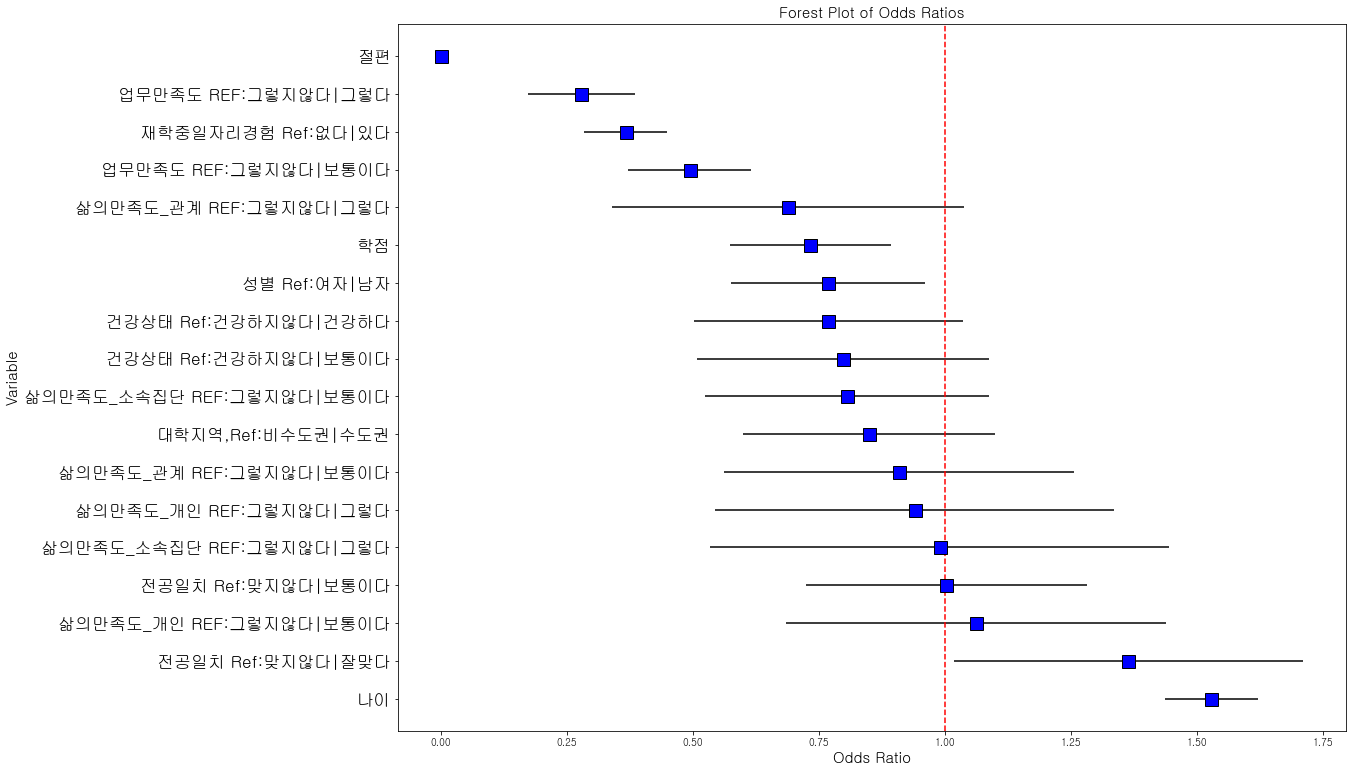

In [40]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios', fontsize=15)

# Show the plot
plt.show()